In [11]:
# Image Pre-Processing
import os
import cv2
from pytesseract import Output, pytesseract
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
%matplotlib inline

font = './OCR_with_Python/Fonts/NanumSquareR.ttf'

In [12]:
def display(img, cmap='gray'):
    # fig = plt.figure(figsize=(11.69,8.27)) # A4 사이즈
    fig = plt.figure(figsize=(16.53, 11.69))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [13]:
def read(path):
    print(os.path)
    images = convert_from_path(path, 1200, size=(1389, 1965))
    filename = os.path.splitext(os.path.basename(path).replace(' ', '_'))[0]
    filedir = os.path.dirname(path)

    result = []

    config = '--psm 6 --oem 1'

    for i, image in enumerate(images):
        fname = '{}.{}.png'.format(filename, i)
        save_path = f'{filedir}/{fname}' 
        image.save(save_path, 'PNG')

        # pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
    #     img = Image.open(save_path)
    #     result.append({i: pytesseract.image_to_string(img, lang='kor+eng', config=config)})

    # return result

In [14]:
def bounding_box(result, img, i, color = (0, 255, 0)):
    x = result['left'][i]
    y = result['top'][i]
    width = result['width'][i]
    height = result['height'][i]

    cv2.rectangle(img, (x, y), (x + width, y + height), color, 2)

    return x, y, img

In [15]:
def write_text(text, x, y, img, font, font_size = 72):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font, fill=(255,0,0,255))
    img = np.array(img_pil)
    return img

In [16]:
# read('./OCR_with_Python/Pdfs/IMGAND_SA200820001_REQ.PDF')

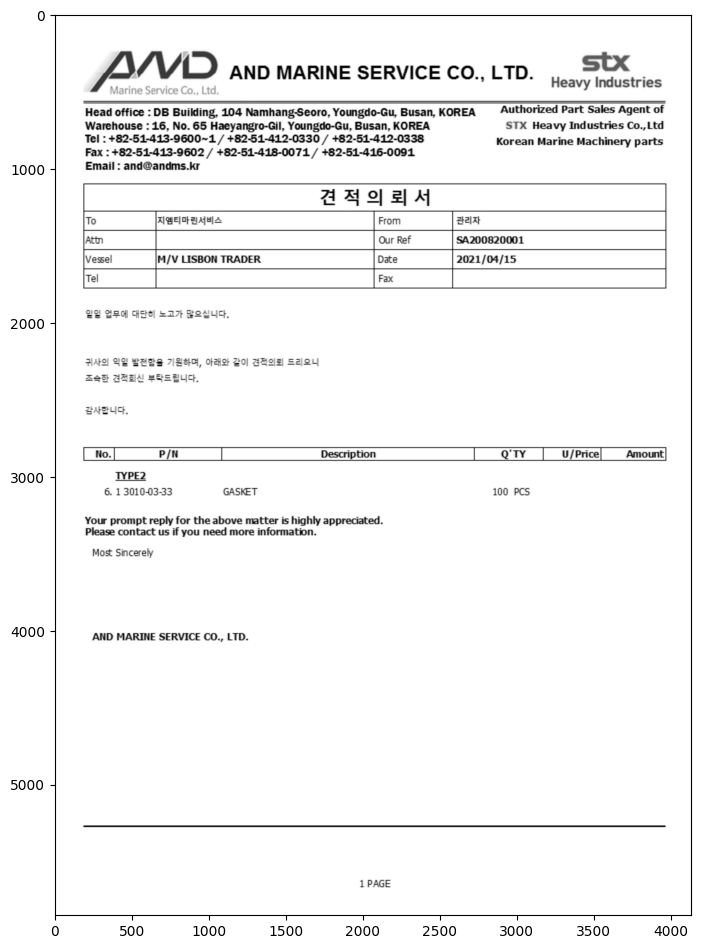

In [17]:
img = cv2.imread('./OCR_with_Python/Pdfs/IMGAND_SA200820001_REQ.0.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display(gray_img)

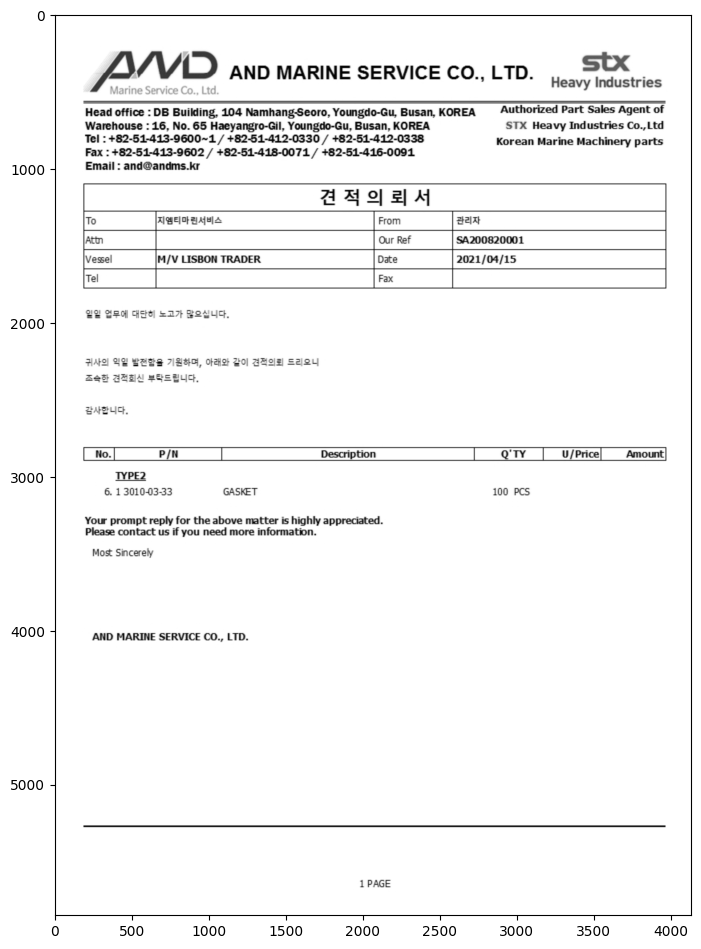

In [18]:
# Opening
erosion = cv2.erode(gray_img, np.ones((3,3), np.uint8))
opening_img = cv2.dilate(erosion, np.ones((3,3), np.uint8))

display(opening_img)

In [19]:
config_tessract = '--tessdata-dir tessdata --psm 6 --oem 1'
result = pytesseract.image_to_data(opening_img, lang='eng+kor', config=config_tessract, output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  3,
  4,
  5,
 

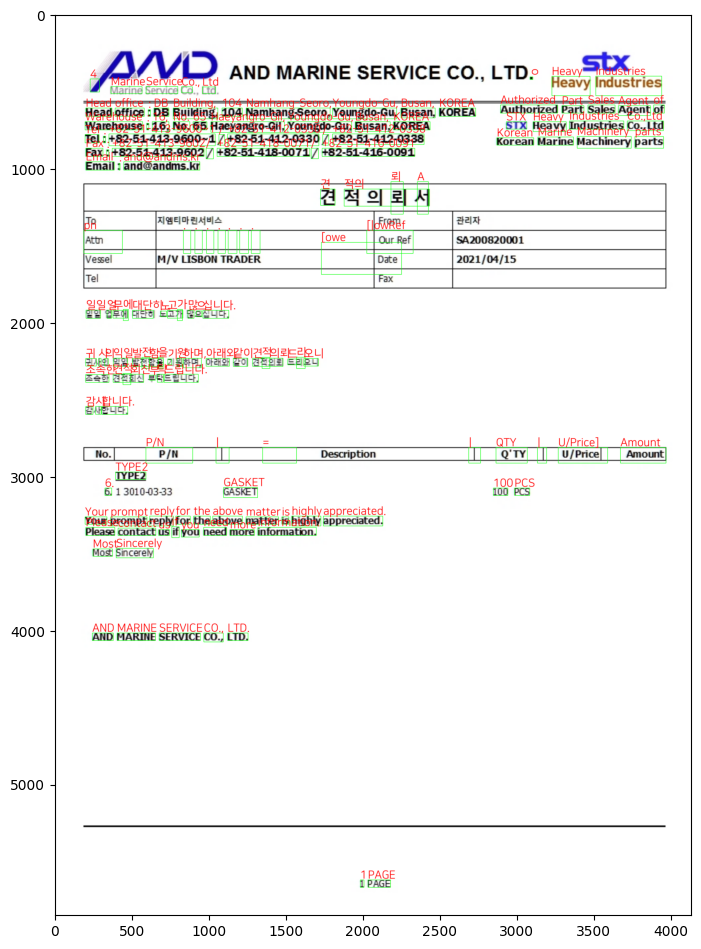

In [20]:
img_copy = img.copy()

min_confidence = 40

for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        text = result['text'][i]
        if not text.isspace() and len(text) > 0:
            x, y, img = bounding_box(result, img_copy, i)
            # cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
            img_copy = write_text(text, x, y, img_copy, font)

display(img_copy)